In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


data_path = "Olympic Data Analysis/Raw Data/athlete_events.csv"
noc_path = "Olympic Data Analysis/Raw Data/noc_regions.csv"
gdp_path = "Olympic Data Analysis/Raw Data/GDP_data.csv"

# Read the data 
data = pd.read_csv(data_path)
noc_data = pd.read_csv(noc_path)
gdp_data =  pd.read_csv(gdp_path)
merge_df = pd.merge(data, noc_data, on="NOC", how="right")

In [151]:
#data cleaning
merge_df = merge_df.rename(columns={"City":"Hosting City", "region":"Athlete Country"})
#add columns for coutnry that we fetch country
merge_df["Hosting Country"] = ""
merge_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Hosting City,Sport,Event,Medal,Athlete Country,notes,Hosting Country
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN,
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN,
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN,


In [152]:
merge_df['Hosting City'].unique()

array(['Melbourne', 'Berlin', 'London', 'Moskva', 'Tokyo', 'Munich',
       'Mexico City', 'Athina', 'Beijing', 'Rio de Janeiro', 'Seoul',
       'Roma', 'Atlanta', 'Los Angeles', 'Helsinki', 'Calgary',
       'Albertville', 'Barcelona', 'Sydney', 'Montreal', 'Sochi',
       'Torino', 'Vancouver', 'Salt Lake City', 'Innsbruck',
       'Lillehammer', 'Nagano', 'Lake Placid', 'Sarajevo', 'Stockholm',
       'Paris', 'Amsterdam', 'Squaw Valley', 'Oslo', 'Sankt Moritz',
       'Grenoble', 'Sapporo', 'Antwerpen', "Cortina d'Ampezzo",
       'Chamonix', 'St. Louis', 'Garmisch-Partenkirchen', nan],
      dtype=object)

In [153]:
#using datafram.loc to set value based on the condition
merge_df.loc[merge_df['Hosting City'] == 'Melbourne', 'Hosting Country'] = 'Australia'
merge_df.loc[merge_df['Hosting City'] == 'Berlin', 'Hosting Country'] = 'Germany'
merge_df.loc[merge_df['Hosting City'] == 'London', 'Hosting Country'] = 'UK'
merge_df.loc[merge_df['Hosting City'] == 'Moskva', 'Hosting Country'] = 'Russia'
merge_df.loc[merge_df['Hosting City'] == 'Tokyo', 'Hosting Country'] = 'Japan'
merge_df.loc[merge_df['Hosting City'] == 'Munich', 'Hosting Country'] = 'Germany'
merge_df.loc[merge_df['Hosting City'] == 'Mexico City', 'Hosting Country'] = 'Mexico'
merge_df.loc[merge_df['Hosting City'] == 'Athina', 'Hosting Country'] = 'Greece'
merge_df.loc[merge_df['Hosting City'] == 'Beijing', 'Hosting Country'] = 'China'
merge_df.loc[merge_df['Hosting City'] == 'Rio de Janeiro', 'Hosting Country'] = 'Brazil'
merge_df.loc[merge_df['Hosting City'] == 'Seoul', 'Hosting Country'] = 'Korea'
merge_df.loc[merge_df['Hosting City'] == 'Roma', 'Hosting Country'] = 'Italy'
merge_df.loc[merge_df['Hosting City'] == 'Atlanta', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Los Angeles', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Helsinki', 'Hosting Country'] = 'Finland'
merge_df.loc[merge_df['Hosting City'] == 'Calgary', 'Hosting Country'] = 'Canada'
merge_df.loc[merge_df['Hosting City'] == 'Albertville', 'Hosting Country'] = 'France'
merge_df.loc[merge_df['Hosting City'] == 'Barcelona', 'Hosting Country'] = 'Spain'
merge_df.loc[merge_df['Hosting City'] == 'Sydney', 'Hosting Country'] = 'Australian'
merge_df.loc[merge_df['Hosting City'] == 'Montreal', 'Hosting Country'] = 'Canada'
merge_df.loc[merge_df['Hosting City'] == 'Sochi', 'Hosting Country'] = 'Russia'
merge_df.loc[merge_df['Hosting City'] == 'Torino', 'Hosting Country'] = 'Italy'
merge_df.loc[merge_df['Hosting City'] == 'Vancouver', 'Hosting Country'] = 'Canada'
merge_df.loc[merge_df['Hosting City'] == 'Salt Lake City', 'Hosting Country'] = 'Utah'
merge_df.loc[merge_df['Hosting City'] == 'Innsbruck', 'Hosting Country'] = 'Austria'
merge_df.loc[merge_df['Hosting City'] == 'Lillehammer', 'Hosting Country'] = 'Norway'
merge_df.loc[merge_df['Hosting City'] == 'Nagano', 'Hosting Country'] = 'Japan'
merge_df.loc[merge_df['Hosting City'] == 'Lake Placid', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Sarajevo', 'Hosting Country'] = 'Bosnia and Herzegovina'
merge_df.loc[merge_df['Hosting City'] == 'Stockholm', 'Hosting Country'] = 'Sweden'
merge_df.loc[merge_df['Hosting City'] == 'Paris', 'Hosting Country'] = 'France'
merge_df.loc[merge_df['Hosting City'] == 'Amsterdam', 'Hosting Country'] = 'Netherlands'
merge_df.loc[merge_df['Hosting City'] == 'Squaw Valley', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Oslo', 'Hosting Country'] = 'Norway'
merge_df.loc[merge_df['Hosting City'] == 'Sankt Moritz', 'Hosting Country'] = 'Switzerland'
merge_df.loc[merge_df['Hosting City'] == 'Grenoble', 'Hosting Country'] = 'France'
merge_df.loc[merge_df['Hosting City'] == 'Sapporo', 'Hosting Country'] = 'Japan'
merge_df.loc[merge_df['Hosting City'] == 'Antwerpen', 'Hosting Country'] = 'Belgium'
merge_df.loc[merge_df['Hosting City'] == "Cortina d'Ampezzo", 'Hosting Country'] = 'Italy'
merge_df.loc[merge_df['Hosting City'] == 'Chamonix', 'Hosting Country'] = 'France'
merge_df.loc[merge_df['Hosting City'] == 'St. Louis', 'Hosting Country'] = 'USA'
merge_df.loc[merge_df['Hosting City'] == 'Garmisch-Partenkirchen', 'Hosting Country'] = 'Germany'


In [154]:
merge_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Hosting City,Sport,Event,Medal,Athlete Country,notes,Hosting Country
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,Australia
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,Germany
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN,UK
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN,Russia
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN,Japan


In [155]:
#top 10 performing countries 
metals_per_country = merge_df.groupby(["Athlete Country"])['Medal'].count()
top_10_countries = pd.DataFrame(metals_per_country).sort_values("Medal", ascending = False).head(10)
top_10_countries

,Medal
Athlete Country,
USA,5637
Russia,3947
Germany,3756
UK,2068
France,1777
Italy,1637
Sweden,1536
Canada,1352
Australia,1349


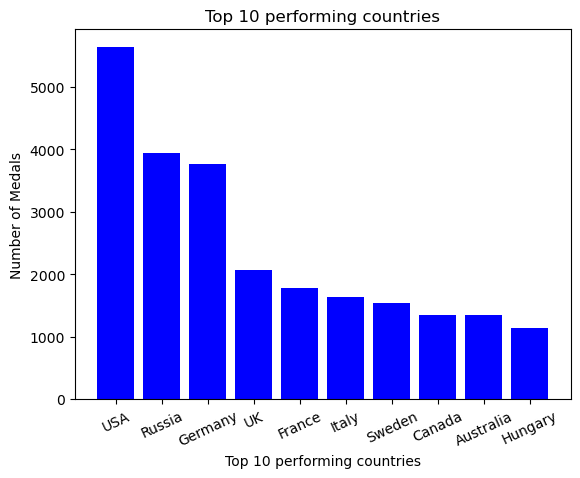

In [156]:
#top 10 performing countries bar chart
plt.bar(top_10_countries.index.values, top_10_countries['Medal'], color = "blue",alpha=1.0, align="center")
plt.title("Top 10 performing countries")
plt.xlabel('Top 10 performing countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=25)
plt.show()

In [157]:
#summer top performing countries
summer_df = pd.DataFrame(merge_df.loc[merge_df["Season"]=="Summer",:])
summermetals_per_country = summer_df.groupby(["Athlete Country"])['Medal'].count()
top_10_summercountries = pd.DataFrame(summermetals_per_country).sort_values("Medal", ascending = False).head(10)
top_10_summercountries

,Medal
Athlete Country,
USA,5002
Russia,3188
Germany,3126
UK,1985
France,1627
Italy,1446
Australia,1333
Hungary,1123
Sweden,1108


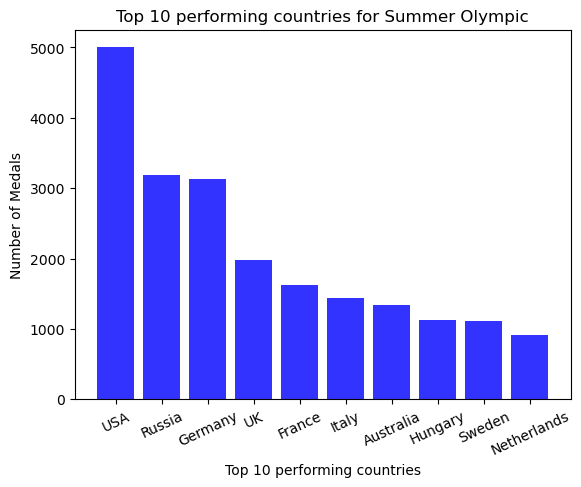

In [158]:
# Generate a bar plot for summer 
plt.bar(top_10_summercountries.index.values, top_10_summercountries['Medal'], color = "blue",alpha=0.8, align="center")
plt.title("Top 10 performing countries for Summer Olympic")
plt.xlabel('Top 10 performing countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=25)
plt.show()

In [159]:
#winter top performing countries
winter_df = pd.DataFrame(merge_df.loc[merge_df["Season"]=="Winter",:])
wintermetals_per_country = winter_df.groupby(["Athlete Country"])['Medal'].count()
top_10_wintercountries = pd.DataFrame(wintermetals_per_country).sort_values("Medal",ascending= False).head(10)
top_10_wintercountries

,Medal
Athlete Country,
Russia,759
USA,635
Germany,630
Canada,611
Norway,443
Sweden,428
Finland,426
Austria,280
Switzerland,275


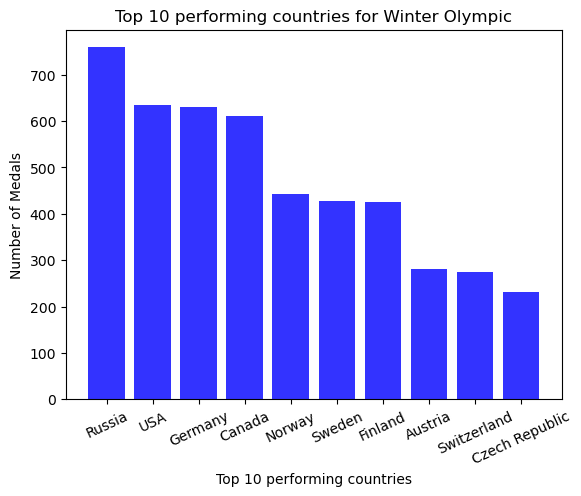

In [160]:
#plot bar graph for winter
plt.bar(top_10_wintercountries.index.values, top_10_wintercountries['Medal'], color = "blue",alpha=0.8, align="center")
plt.title("Top 10 performing countries for Winter Olympic")
plt.xlabel('Top 10 performing countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=25)
plt.show()

In [161]:
#hosting cities
merge_df['Hosting City'].unique()

array(['Melbourne', 'Berlin', 'London', 'Moskva', 'Tokyo', 'Munich',
       'Mexico City', 'Athina', 'Beijing', 'Rio de Janeiro', 'Seoul',
       'Roma', 'Atlanta', 'Los Angeles', 'Helsinki', 'Calgary',
       'Albertville', 'Barcelona', 'Sydney', 'Montreal', 'Sochi',
       'Torino', 'Vancouver', 'Salt Lake City', 'Innsbruck',
       'Lillehammer', 'Nagano', 'Lake Placid', 'Sarajevo', 'Stockholm',
       'Paris', 'Amsterdam', 'Squaw Valley', 'Oslo', 'Sankt Moritz',
       'Grenoble', 'Sapporo', 'Antwerpen', "Cortina d'Ampezzo",
       'Chamonix', 'St. Louis', 'Garmisch-Partenkirchen', nan],
      dtype=object)

In [162]:
merge_df['Hosting City'].nunique()

42

In [163]:
#host country 
hostcountry_df = merge_df.groupby(['Hosting Country','Year','Season','Athlete Country'])['Medal'].count().reset_index(name='Medal_Count')
hostcountry_df

,Hosting Country,Year,Season,Athlete Country,Medal_Count
0,Australia,1956.0,Summer,Afghanistan,0
1,Australia,1956.0,Summer,Argentina,2
2,Australia,1956.0,Summer,Australia,67
3,Australia,1956.0,Summer,Austria,4
4,Australia,1956.0,Summer,Bahamas,2
...,...,...,...,...,...
3805,Utah,2002.0,Winter,USA,84
3806,Utah,2002.0,Winter,Ukraine,0
3807,Utah,2002.0,Winter,Uzbekistan,0
3808,Utah,2002.0,Winter,Venezuela,0


In [164]:
#France
France_df = pd.DataFrame(hostcountry_df.loc[hostcountry_df['Athlete Country'] == "France",:])
France_df = France_df.sort_values("Year")


In [165]:
Summer_France_df = France_df.loc[France_df['Season'] == "Summer",:]
Summer_France_df = Summer_France_df.sort_values("Year")

In [166]:
#hosting by France 
Summer_Francehosting_df = Summer_France_df.loc[Summer_France_df['Hosting Country'] == "France",:]
Summer_Francehosting_df

,Hosting Country,Year,Season,Athlete Country,Medal_Count
1119,France,1900.0,Summer,France,235
1155,France,1924.0,Summer,France,110


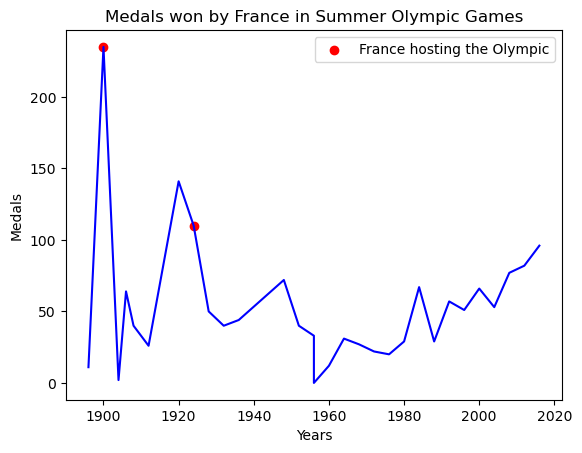

In [167]:
# Plot for Medals by Years
plt.plot(Summer_France_df['Year'], Summer_France_df['Medal_Count'], c='blue')
plt.scatter(Summer_Francehosting_df['Year'], Summer_Francehosting_df['Medal_Count'], c='r', label='France hosting the Olympic')

# Title and Axis
plt.title('Medals won by France in Summer Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [168]:
Winter_France_df = France_df.loc[France_df['Season'] == "Winter",:]
Winter_France_df = Winter_France_df.sort_values("Year")
Winter_France_df

,Hosting Country,Year,Season,Athlete Country,Medal_Count
1191,France,1924.0,Winter,France,10
2929,Switzerland,1928.0,Winter,France,2
3323,USA,1932.0,Winter,France,2
1361,Germany,1936.0,Winter,France,1
2956,Switzerland,1948.0,Winter,France,5
2443,Norway,1952.0,Winter,France,1
1740,Italy,1956.0,Winter,France,0
3344,USA,1960.0,Winter,France,3
273,Austria,1964.0,Winter,France,7
1213,France,1968.0,Winter,France,9


In [169]:
#hosting by France 
Winter_Francehosting_df = Winter_France_df.loc[Winter_France_df['Hosting Country'] == "France",:]
Winter_Francehosting_df

,Hosting Country,Year,Season,Athlete Country,Medal_Count
1191,France,1924.0,Winter,France,10
1213,France,1968.0,Winter,France,9
1261,France,1992.0,Winter,France,12


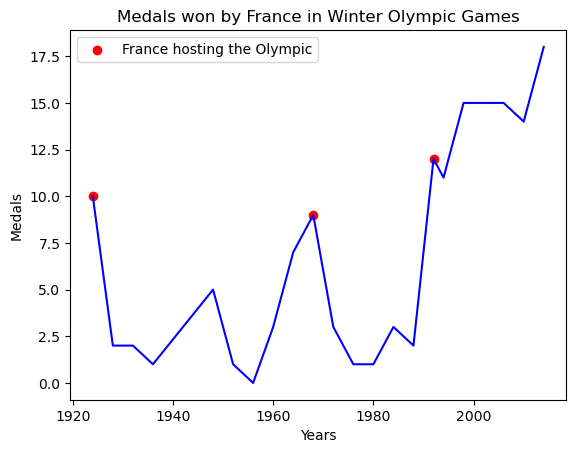

In [170]:
# Plot for Medals by Years
plt.plot(Winter_France_df['Year'], Winter_France_df['Medal_Count'], c='blue')
plt.scatter(Winter_Francehosting_df['Year'], Winter_Francehosting_df['Medal_Count'], c='r', label='France hosting the Olympic')

# Title and Axis
plt.title('Medals won by France in Winter Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [171]:
#france GDP
france_gdp = pd.DataFrame(gdp_data.loc[gdp_data['Country Name'] == "France"])
france_gdp = france_gdp.drop(['Country Name','Country Code', 'Indicator Name','Indicator Code'],axis=1)
france_gdp = france_gdp.transpose()
france_gdp["new"] = ""


In [173]:
#japan
Japan_df = pd.DataFrame(hostcountry_df.loc[hostcountry_df['Athlete Country'] == "Japan",:])
Japan_df = Japan_df.sort_values("Year")
Japan_df

,Hosting Country,Year,Season,Athlete Country,Medal_Count
2879,Sweden,1912.0,Summer,Japan,0
350,Belgium,1920.0,Summer,Japan,3
1162,France,1924.0,Summer,Japan,1
2933,Switzerland,1928.0,Winter,Japan,0
2408,Netherlands,1928.0,Summer,Japan,9
3295,USA,1932.0,Summer,Japan,31
3327,USA,1932.0,Winter,Japan,0
1366,Germany,1936.0,Winter,Japan,0
1330,Germany,1936.0,Summer,Japan,23
2449,Norway,1952.0,Winter,Japan,0


In [174]:
Summer_Japan_df = Japan_df.loc[Japan_df['Season'] == "Summer",:]
Summer_Japan_df = Summer_Japan_df.sort_values("Year")

In [175]:
#hosting by Japan
Summer_Japanhosting_df = Summer_Japan_df.loc[Summer_Japan_df['Hosting Country'] == "Japan",:]
Summer_Japanhosting_df

,Hosting Country,Year,Season,Athlete Country,Medal_Count
1965,Japan,1964.0,Summer,Japan,62


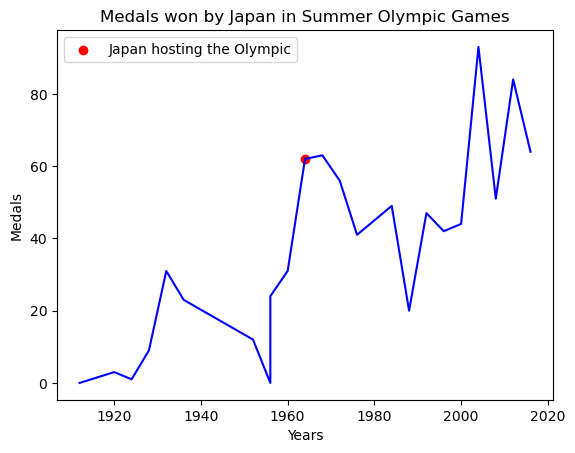

In [177]:
# Plot for Medals by Years
plt.plot(Summer_Japan_df['Year'], Summer_Japan_df['Medal_Count'], c='blue')
plt.scatter(Summer_Japanhosting_df['Year'], Summer_Japanhosting_df['Medal_Count'], c='r', label='Japan hosting the Olympic')

# Title and Axis
plt.title('Medals won by Japan in Summer Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [178]:
Winter_Japan_df = Japan_df.loc[Japan_df['Season'] == "Winter",:]
Winter_Japan_df = Winter_Japan_df.sort_values("Year")
Winter_Japan_df

,Hosting Country,Year,Season,Athlete Country,Medal_Count
2933,Switzerland,1928.0,Winter,Japan,0
3327,USA,1932.0,Winter,Japan,0
1366,Germany,1936.0,Winter,Japan,0
2449,Norway,1952.0,Winter,Japan,0
1747,Italy,1956.0,Winter,Japan,1
3349,USA,1960.0,Winter,Japan,0
281,Austria,1964.0,Winter,Japan,0
1221,France,1968.0,Winter,Japan,0
2030,Japan,1972.0,Winter,Japan,3
316,Austria,1976.0,Winter,Japan,0


In [179]:
#hosting by Japan
Winter_Japanhosting_df = Winter_Japan_df.loc[Winter_Japan_df['Hosting Country'] == "Japan",:]
Winter_Japanhosting_df

,Hosting Country,Year,Season,Athlete Country,Medal_Count
2030,Japan,1972.0,Winter,Japan,3
2083,Japan,1998.0,Winter,Japan,13


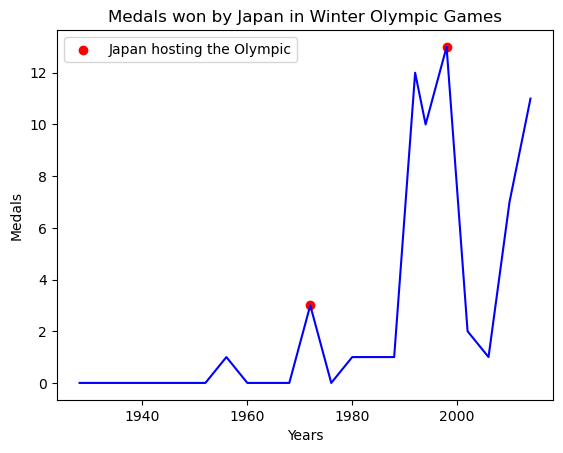

In [180]:
# Plot for Medals by Years
plt.plot(Winter_Japan_df['Year'], Winter_Japan_df['Medal_Count'], c='blue')
plt.scatter(Winter_Japanhosting_df['Year'], Winter_Japanhosting_df['Medal_Count'], c='r', label='Japan hosting the Olympic')

# Title and Axis
plt.title('Medals won by Japan in Winter Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()